/home/christoforos/anaconda3/envs/nilm/lib/python3.7/site-packages/nilmtk/utils.py:502: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")


TIMING: NILMTK converting mains to dataframe: 16.54
100000
       (54, 1, UK-DALE)
count      3.469800e+06
mean       3.110080e+02
std        4.187989e+02
min        4.727666e+01
25%        1.395367e+02
50%        2.054350e+02
75%        3.256867e+02
max        7.910050e+03


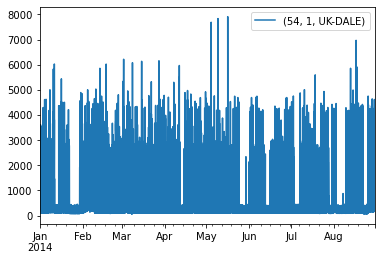

In [1]:
import sys
sys.path.append('../..')
from datasources.datasource import DatasourceFactory
import datasources.datasource
import utils.chaotic_toolkit as ct
import nilmlab.tstransformers as ts

year = '2014'
month_end = '8'
month_start = '1'
end_date = "{}-30-{}".format(month_end, year)
start_date = "{}-1-{}".format(month_start, year)
sample_period = 6
datasource = DatasourceFactory.create_uk_dale_datasource()
df_mains, metergroup = datasource.read_mains(start=start_date, end=end_date, sample_period=6, building=1)
data = df_mains[(54, 1, "UK-DALE")].values
data = data[:100000]
print(len(data))
print(df_mains.describe())
df_mains.plot()
# data = df_mains[(1, 1, 'REDD')].values

[4, 9, 14]
Delay 5


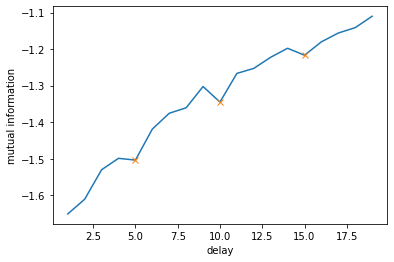

In [2]:
import numpy as np
import matplotlib.pyplot as plt #plotting
from mpl_toolkits.mplot3d import Axes3D #3d plots

mutual_information_per_delay = []
for i in range(1,20):
#     print(f"iteration {i}")
    mutual_information_per_delay = np.append(mutual_information_per_delay,[ct.compute_mutual_information(data, i, 50)])

local_min = [i 
             for i in range(1, len(mutual_information_per_delay) -1) 
                            if (mutual_information_per_delay[i] < mutual_information_per_delay[i-1]
                            and mutual_information_per_delay[i] < mutual_information_per_delay[i+1])]    
print(local_min)
local_min_idx = [i + 1 for i in local_min]
plt.plot(range(1, 20), mutual_information_per_delay)
plt.plot(local_min_idx, mutual_information_per_delay[local_min], 'x')
plt.xlabel('delay')
plt.ylabel('mutual information')
delay = local_min_idx[0]
print(f"Delay {delay}")

[0.6734, 0.62873, 0.2491, 0.11505, 0.07475, 0.05378, 0.04291, 0.03713, 0.03155, 0.02798, 0.02445, 0.02209, 0.01977, 0.01813]
[6, 7, 8, 9, 10, 11, 12, 13]


Text(0, 0.5, 'Fraction of false neighbors')

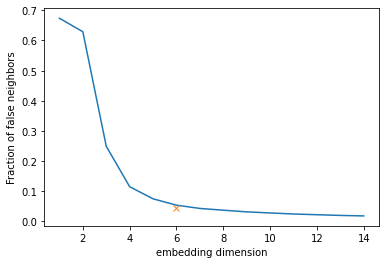

In [3]:
false_neighbors = []

for i in range(1,15):
    false_neighbors.append(ct.calculate_false_nearest_neighours(data, delay, i) / len(data))
    
zeros = [i for i in range(0, len(false_neighbors)) if false_neighbors[i] < 0.05]
print(false_neighbors)
print(zeros)
plt.plot(range(1,15),false_neighbors)
plt.plot(zeros[0], false_neighbors[zeros[0]], 'x')

plt.xlabel('embedding dimension')
plt.ylabel('Fraction of false neighbors')